In [1]:
!git clone https://github.com/fastai/course-v3
%cd /content/course-v3/nbs/dl2

Cloning into 'course-v3'...
remote: Enumerating objects: 5893, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 5893 (delta 0), reused 2 (delta 0), pack-reused 5890
Receiving objects: 100% (5893/5893), 263.03 MiB | 34.06 MiB/s, done.
Resolving deltas: 100% (3249/3249), done.
/content/course-v3/nbs/dl2


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from exp.nb_07a import *

In [80]:
[(i, getattr(datasets.URLs, i)) for i in dir(datasets.URLs) if 'path' in i.lower()]

[('LOCAL_PATH', PosixPath('/content/course-v3/nbs/dl2'))]

In [15]:
[(i, getattr(datasets.URLs, i)) for i in dir(datasets.URLs) if 'imagenett' in i.lower()]

[('IMAGENETTE', 'https://s3.amazonaws.com/fast-ai-imageclas/imagenette2'),
 ('IMAGENETTE_160',
  'https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160'),
 ('IMAGENETTE_320',
  'https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-320')]

In [16]:
path = datasets.untar_data(datasets.URLs.IMAGENETTE_160); path

PosixPath('/root/.fastai/data/imagenette2-160')

In [18]:
path.ls()

[PosixPath('/root/.fastai/data/imagenette2-160/noisy_imagenette.csv'),
 PosixPath('/root/.fastai/data/imagenette2-160/.DS_Store'),
 PosixPath('/root/.fastai/data/imagenette2-160/val'),
 PosixPath('/root/.fastai/data/imagenette2-160/train')]

In [28]:
from pathlib import Path
Path.ls = lambda x: list(x.iterdir())
# Path.ls = lambda x: x

In [ ]:
import PIL

In [77]:
!cat {datasets.__file__}

from .core import *
import hashlib

__all__ = ['URLs', 'Config', 'untar_data', 'download_data', 'datapath4file', 'url2name', 'url2path']

MODEL_URL = 'http://files.fast.ai/models/'
URL = 'http://files.fast.ai/data/examples/'
class URLs():
    "Global constants for dataset and model URLs."
    LOCAL_PATH = Path.cwd()
    S3 = 'https://s3.amazonaws.com/fast-ai-'

    S3_IMAGE    = f'{S3}imageclas/'
    S3_IMAGELOC = f'{S3}imagelocal/'
    S3_NLP      = f'{S3}nlp/'
    S3_COCO     = f'{S3}coco/'
    S3_MODEL    = f'{S3}modelzoo/'

    # main datasets
    ADULT_SAMPLE        = f'{URL}adult_sample'
    BIWI_SAMPLE         = f'{URL}biwi_sample'
    CIFAR               = f'{URL}cifar10'
    COCO_SAMPLE         = f'{S3_COCO}coco_sample'
    COCO_TINY           = f'{URL}coco_tiny'
    HUMAN_NUMBERS       = f'{URL}human_numbers'
    IMDB                = f'{S3_NLP}imdb'
    IMDB_SAMPLE         = f'{URL}imdb_sample'
    ML_SAMPLE           = f'{URL}movie_lens_sample'
    MNIST_SAMPLE        = f'{

In [30]:
path = Path('/root/.fastai/data/imagenette2-160')
path.ls()

[PosixPath('/root/.fastai/data/imagenette2-160/noisy_imagenette.csv'),
 PosixPath('/root/.fastai/data/imagenette2-160/.DS_Store'),
 PosixPath('/root/.fastai/data/imagenette2-160/val'),
 PosixPath('/root/.fastai/data/imagenette2-160/train')]

In [31]:

def show_dir(x): return dir(x)
Path.ls2 = show_dir
path2 = Path('/root/.fastai/data/imagenette2-160')
path2.ls2()


['__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__fspath__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__truediv__',
 '_accessor',
 '_cached_cparts',
 '_closed',
 '_cparts',
 '_drv',
 '_flavour',
 '_format_parsed_parts',
 '_from_parsed_parts',
 '_from_parts',
 '_hash',
 '_init',
 '_make_child',
 '_make_child_relpath',
 '_opener',
 '_parse_args',
 '_parts',
 '_pparts',
 '_raise_closed',
 '_raw_open',
 '_root',
 '_str',
 'absolute',
 'anchor',
 'as_posix',
 'as_uri',
 'chmod',
 'cwd',
 'drive',
 'exists',
 'expanduser',
 'glob',
 'group',
 'home',
 'is_absolute',
 'is_block_device',
 'is_char_device',
 'is_dir',
 'is_fifo',
 'is_file',
 'is_mount',
 'is_reserved',
 '

In [32]:
path.ls()

[PosixPath('/root/.fastai/data/imagenette2-160/noisy_imagenette.csv'),
 PosixPath('/root/.fastai/data/imagenette2-160/.DS_Store'),
 PosixPath('/root/.fastai/data/imagenette2-160/val'),
 PosixPath('/root/.fastai/data/imagenette2-160/train')]

In [34]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/imagenette2-160/train/n03417042'),
 PosixPath('/root/.fastai/data/imagenette2-160/train/.DS_Store'),
 PosixPath('/root/.fastai/data/imagenette2-160/train/n03445777'),
 PosixPath('/root/.fastai/data/imagenette2-160/train/n03888257'),
 PosixPath('/root/.fastai/data/imagenette2-160/train/n03028079'),
 PosixPath('/root/.fastai/data/imagenette2-160/train/n03000684'),
 PosixPath('/root/.fastai/data/imagenette2-160/train/n02979186'),
 PosixPath('/root/.fastai/data/imagenette2-160/train/n03425413'),
 PosixPath('/root/.fastai/data/imagenette2-160/train/n01440764'),
 PosixPath('/root/.fastai/data/imagenette2-160/train/n02102040'),
 PosixPath('/root/.fastai/data/imagenette2-160/train/n03394916')]

In [35]:
(path/'val').ls()

[PosixPath('/root/.fastai/data/imagenette2-160/val/n03417042'),
 PosixPath('/root/.fastai/data/imagenette2-160/val/n03445777'),
 PosixPath('/root/.fastai/data/imagenette2-160/val/n03888257'),
 PosixPath('/root/.fastai/data/imagenette2-160/val/n03028079'),
 PosixPath('/root/.fastai/data/imagenette2-160/val/n03000684'),
 PosixPath('/root/.fastai/data/imagenette2-160/val/n02979186'),
 PosixPath('/root/.fastai/data/imagenette2-160/val/n03425413'),
 PosixPath('/root/.fastai/data/imagenette2-160/val/n01440764'),
 PosixPath('/root/.fastai/data/imagenette2-160/val/n02102040'),
 PosixPath('/root/.fastai/data/imagenette2-160/val/n03394916')]

In [56]:
# class name and its number of instance
[(train_class_path.name, len(train_class_path.ls())) for train_class_path in (path/'train').ls() if train_class_path.is_dir()]
# first class and it's instance
len((path/'train').ls()[0].ls()), (path/'train').ls()[0].ls()[0]

(961,
 PosixPath('/root/.fastai/data/imagenette2-160/train/n03417042/n03417042_10717.JPEG'))

In [58]:
train_dir = [i for i in (path/'train').iterdir() if i.is_dir()]

In [59]:
len(train_dir)

10

In [83]:
import numpy

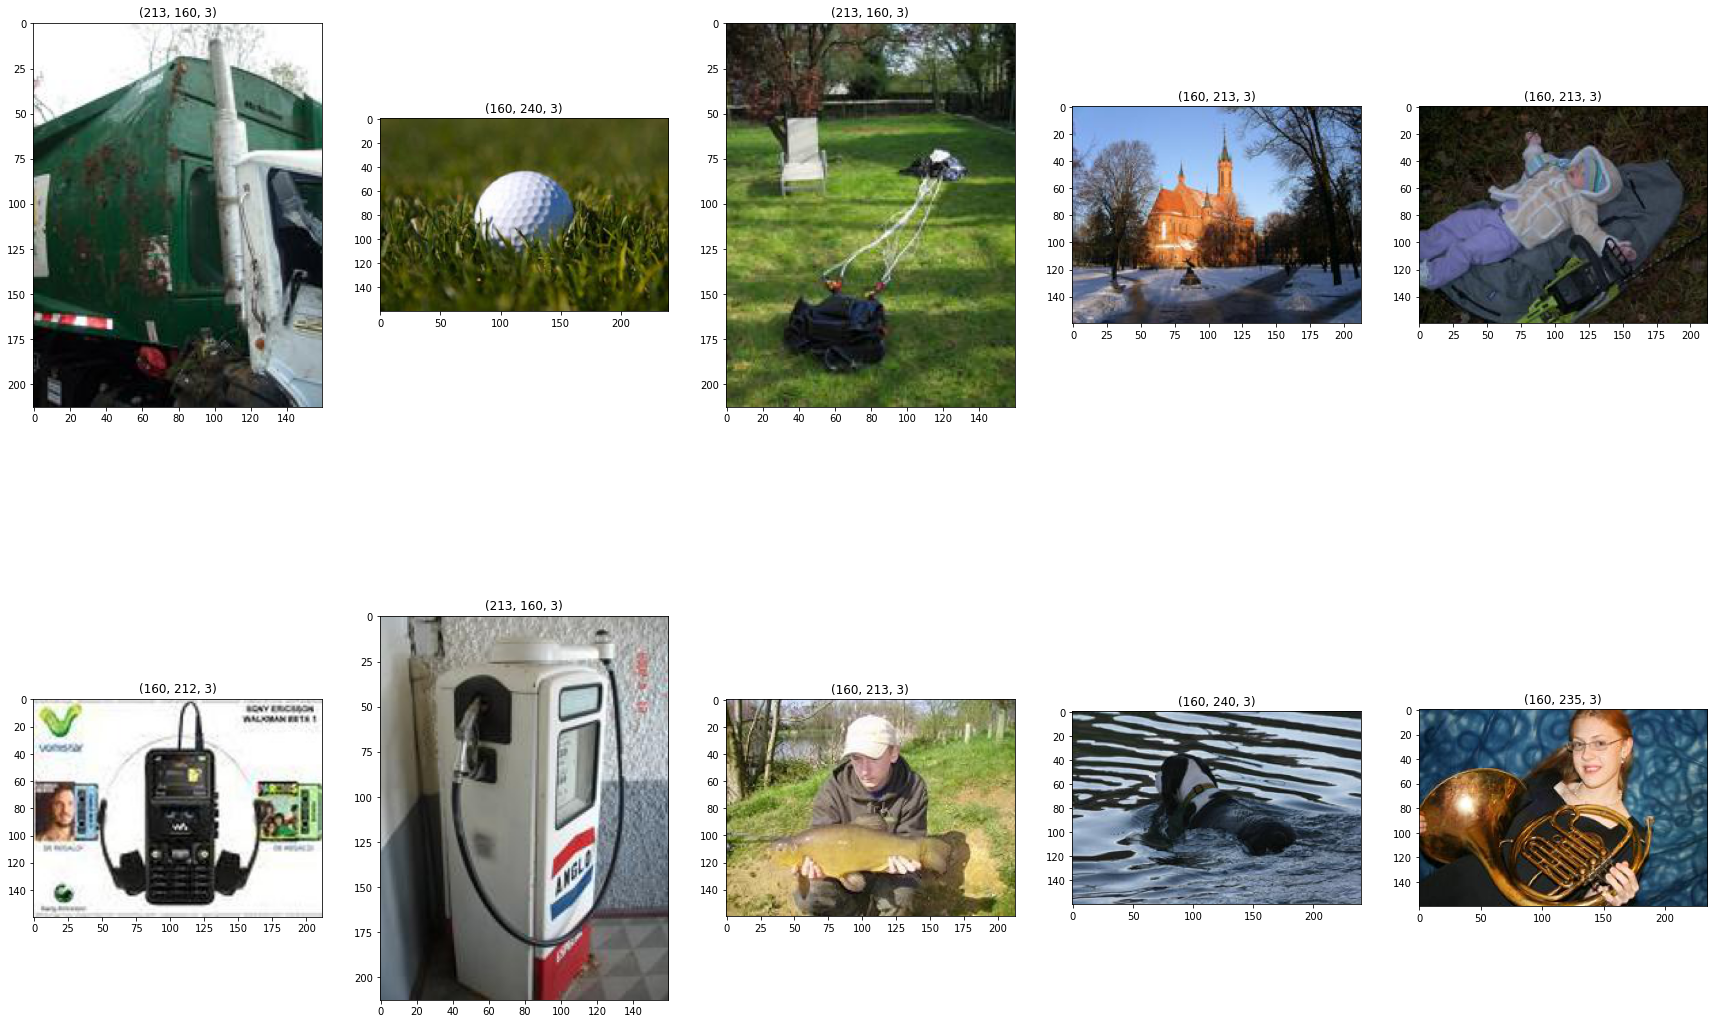

In [85]:
fig, axes = plt.subplots(2, 5, figsize=(30, 20))
for idx, (class_path, ax) in enumerate(zip(train_dir, axes.flatten())):
    img_path = class_path.ls()[0]
    img = PIL.Image.open(img_path)
    ax.set_title(f"{numpy.array(img).shape}")
    ax.imshow(img)

In [47]:
img_path = (path/'train').ls()[0].ls()[1]

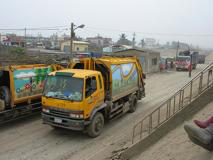

In [49]:
img=PIL.Image.open(img_path); img

---

In [86]:
import mimetypes

## mimetype: mapping filename to media type 
https://docs.python.org/3/library/mimetypes.html

In [89]:
len(mimetypes.types_map), mimetypes.types_map

(566,
 {'.%': 'application/x-trash',
  '.323': 'text/h323',
  '.3gp': 'video/3gpp',
  '.7z': 'application/x-7z-compressed',
  '.a': 'application/octet-stream',
  '.abw': 'application/x-abiword',
  '.ai': 'application/postscript',
  '.aif': 'audio/x-aiff',
  '.aifc': 'audio/x-aiff',
  '.aiff': 'audio/x-aiff',
  '.alc': 'chemical/x-alchemy',
  '.amr': 'audio/amr',
  '.anx': 'application/annodex',
  '.apk': 'application/vnd.android.package-archive',
  '.appcache': 'text/cache-manifest',
  '.application': 'application/x-ms-application',
  '.art': 'image/x-jg',
  '.asc': 'text/plain',
  '.asf': 'video/x-ms-asf',
  '.asn': 'chemical/x-ncbi-asn1-spec',
  '.aso': 'chemical/x-ncbi-asn1-binary',
  '.asx': 'video/x-ms-asf',
  '.atom': 'application/atom+xml',
  '.atomcat': 'application/atomcat+xml',
  '.atomsrv': 'application/atomserv+xml',
  '.au': 'audio/basic',
  '.avi': 'video/x-msvideo',
  '.awb': 'audio/amr-wb',
  '.axa': 'audio/annodex',
  '.axv': 'video/annodex',
  '.b': 'chemical/x-molcon

In [91]:
# all media
set(v.split('/')[0] for k, v in mimetypes.types_map.items())

{'application',
 'audio',
 'chemical',
 'image',
 'message',
 'model',
 'text',
 'video',
 'x-conference',
 'x-epoc',
 'x-world'}

In [96]:
get_extensions= lambda x: set(k for k, v in mimetypes.types_map.items() if v.startswith(f'{x}/'))
list(map(get_extensions, ['image','text','audio']))

[{'.art',
  '.bmp',
  '.cdr',
  '.cdt',
  '.cpt',
  '.cr2',
  '.crw',
  '.djv',
  '.djvu',
  '.erf',
  '.gif',
  '.ico',
  '.ief',
  '.jng',
  '.jp2',
  '.jpe',
  '.jpeg',
  '.jpf',
  '.jpg',
  '.jpg2',
  '.jpm',
  '.jpx',
  '.nef',
  '.orf',
  '.pat',
  '.pbm',
  '.pcx',
  '.pgm',
  '.png',
  '.pnm',
  '.ppm',
  '.psd',
  '.ras',
  '.rgb',
  '.svg',
  '.svgz',
  '.tif',
  '.tiff',
  '.wbmp',
  '.xbm',
  '.xpm',
  '.xwd'},
 {'.323',
  '.appcache',
  '.asc',
  '.bib',
  '.boo',
  '.brf',
  '.c',
  '.c++',
  '.cc',
  '.cls',
  '.cpp',
  '.csh',
  '.css',
  '.csv',
  '.cxx',
  '.d',
  '.diff',
  '.etx',
  '.gcd',
  '.h',
  '.h++',
  '.hh',
  '.hpp',
  '.hs',
  '.htc',
  '.htm',
  '.html',
  '.hxx',
  '.ics',
  '.icz',
  '.jad',
  '.java',
  '.ksh',
  '.lhs',
  '.ltx',
  '.ly',
  '.markdown',
  '.md',
  '.mml',
  '.moc',
  '.p',
  '.pas',
  '.patch',
  '.pl',
  '.pm',
  '.pot',
  '.py',
  '.rtx',
  '.scala',
  '.sct',
  '.sfv',
  '.sgm',
  '.sgml',
  '.sh',
  '.shtml',
  '.srt',
  '.sty',


In [98]:
' '.join(get_extensions('text'))

'.boo .pot .bib .h++ .cpp .htc .sh .mml .sct .tk .wml .vcs .323 .csh .srt .cc .cls .tcl .css .diff .sfv .pas .html .htm .txt .py .hs .hxx .vcard .moc .markdown .scala .ics .text .ttl .tm .c .appcache .wsc .gcd .pm .cxx .patch .h .wmls .tex .sgml .sgm .ksh .pl .tsv .brf .d .ltx .p .vcf .c++ .etx .sty .csv .rtx .hh .ly .shtml .asc .jad .uls .lhs .hpp .icz .md .java'